In [1]:
from pf2rnaseq.factorization import pf2
from pf2rnaseq.imports import import_Vanderbilt_scRNAseq

X_norm = import_Vanderbilt_scRNAseq()
X_pf2 = pf2(X_norm, rank=120, tolerance=1e-6)

/home/asm/.cache/pypoetry/virtualenvs/pf2rnaseq-SLxP6oS5-py3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
 11%|█         | 55/500 [14:23<1:56:23, 15.69s/it, R2X=0.0652, error=0.935, jump=2.63, Δ=7.54e-8]
/home/asm/.cache/pypoetry/virtualenvs/pf2rnaseq-SLxP6oS5-py3.12/lib/python3.12/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 1
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


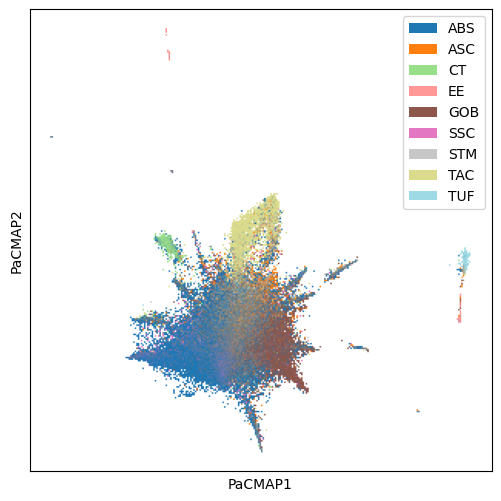

In [6]:
from pf2rnaseq.figures.commonFuncs.plotPaCMAP import plot_labels_pacmap, plot_gene_pacmap
from matplotlib import pyplot as plt


plt.figure(figsize=(6, 6))
plot_labels_pacmap(X_pf2, "Cell_Type", plt.gca())

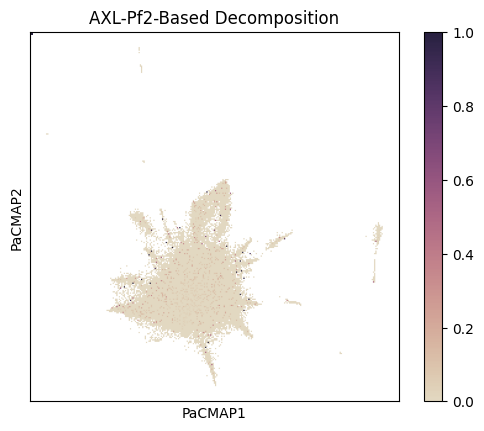

In [7]:
plot_gene_pacmap("AXL", "Pf2", X_pf2, plt.gca())

In [8]:
import numpy as np

np.histogram(X_pf2[:, "AXL"].X.toarray())

(array([64242,   189,   264,   207,   103,    50,    20,     9,     2,
            2]),
 array([0.        , 0.10068695, 0.2013739 , 0.30206087, 0.4027478 ,
        0.5034348 , 0.60412174, 0.7048087 , 0.8054956 , 0.9061826 ,
        1.0068696 ], dtype=float32))

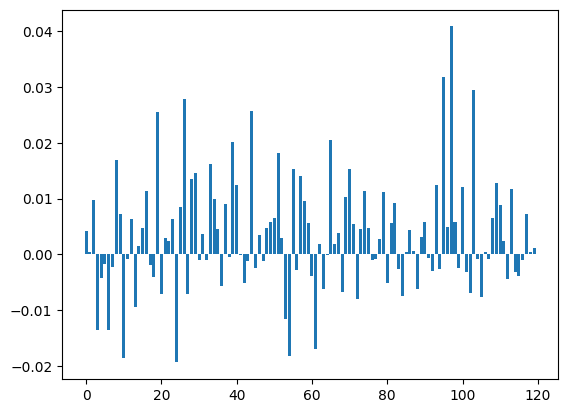

In [10]:
plt.bar(np.arange(120), X_pf2[:, "AXL"].varm["Pf2_C"].flatten());

In [ ]:
np.sum(X_pf2.varm["Pf2_C"][:, 37] > 0.042)

In [ ]:
X_pf2.var.index[X_pf2.varm["Pf2_C"][:, 37] > 0.045]